In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


%matplotlib inline

In [42]:
# loans_tr 데이터를 load
df = pd.read_csv('loans_tr.csv')
df.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 15 columns):
Unnamed: 0           8578 non-null int64
credit.policy        8578 non-null int64
purpose              8578 non-null object
int.rate             8578 non-null float64
installment          8578 non-null float64
log.annual.inc       8578 non-null float64
dti                  8578 non-null float64
fico                 8578 non-null int64
days.with.cr.line    8578 non-null float64
revol.bal            8578 non-null int64
revol.util           8578 non-null float64
inq.last.6mths       8578 non-null int64
delinq.2yrs          8578 non-null int64
pub.rec              8578 non-null int64
not.fully.paid       8578 non-null int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1005.3+ KB


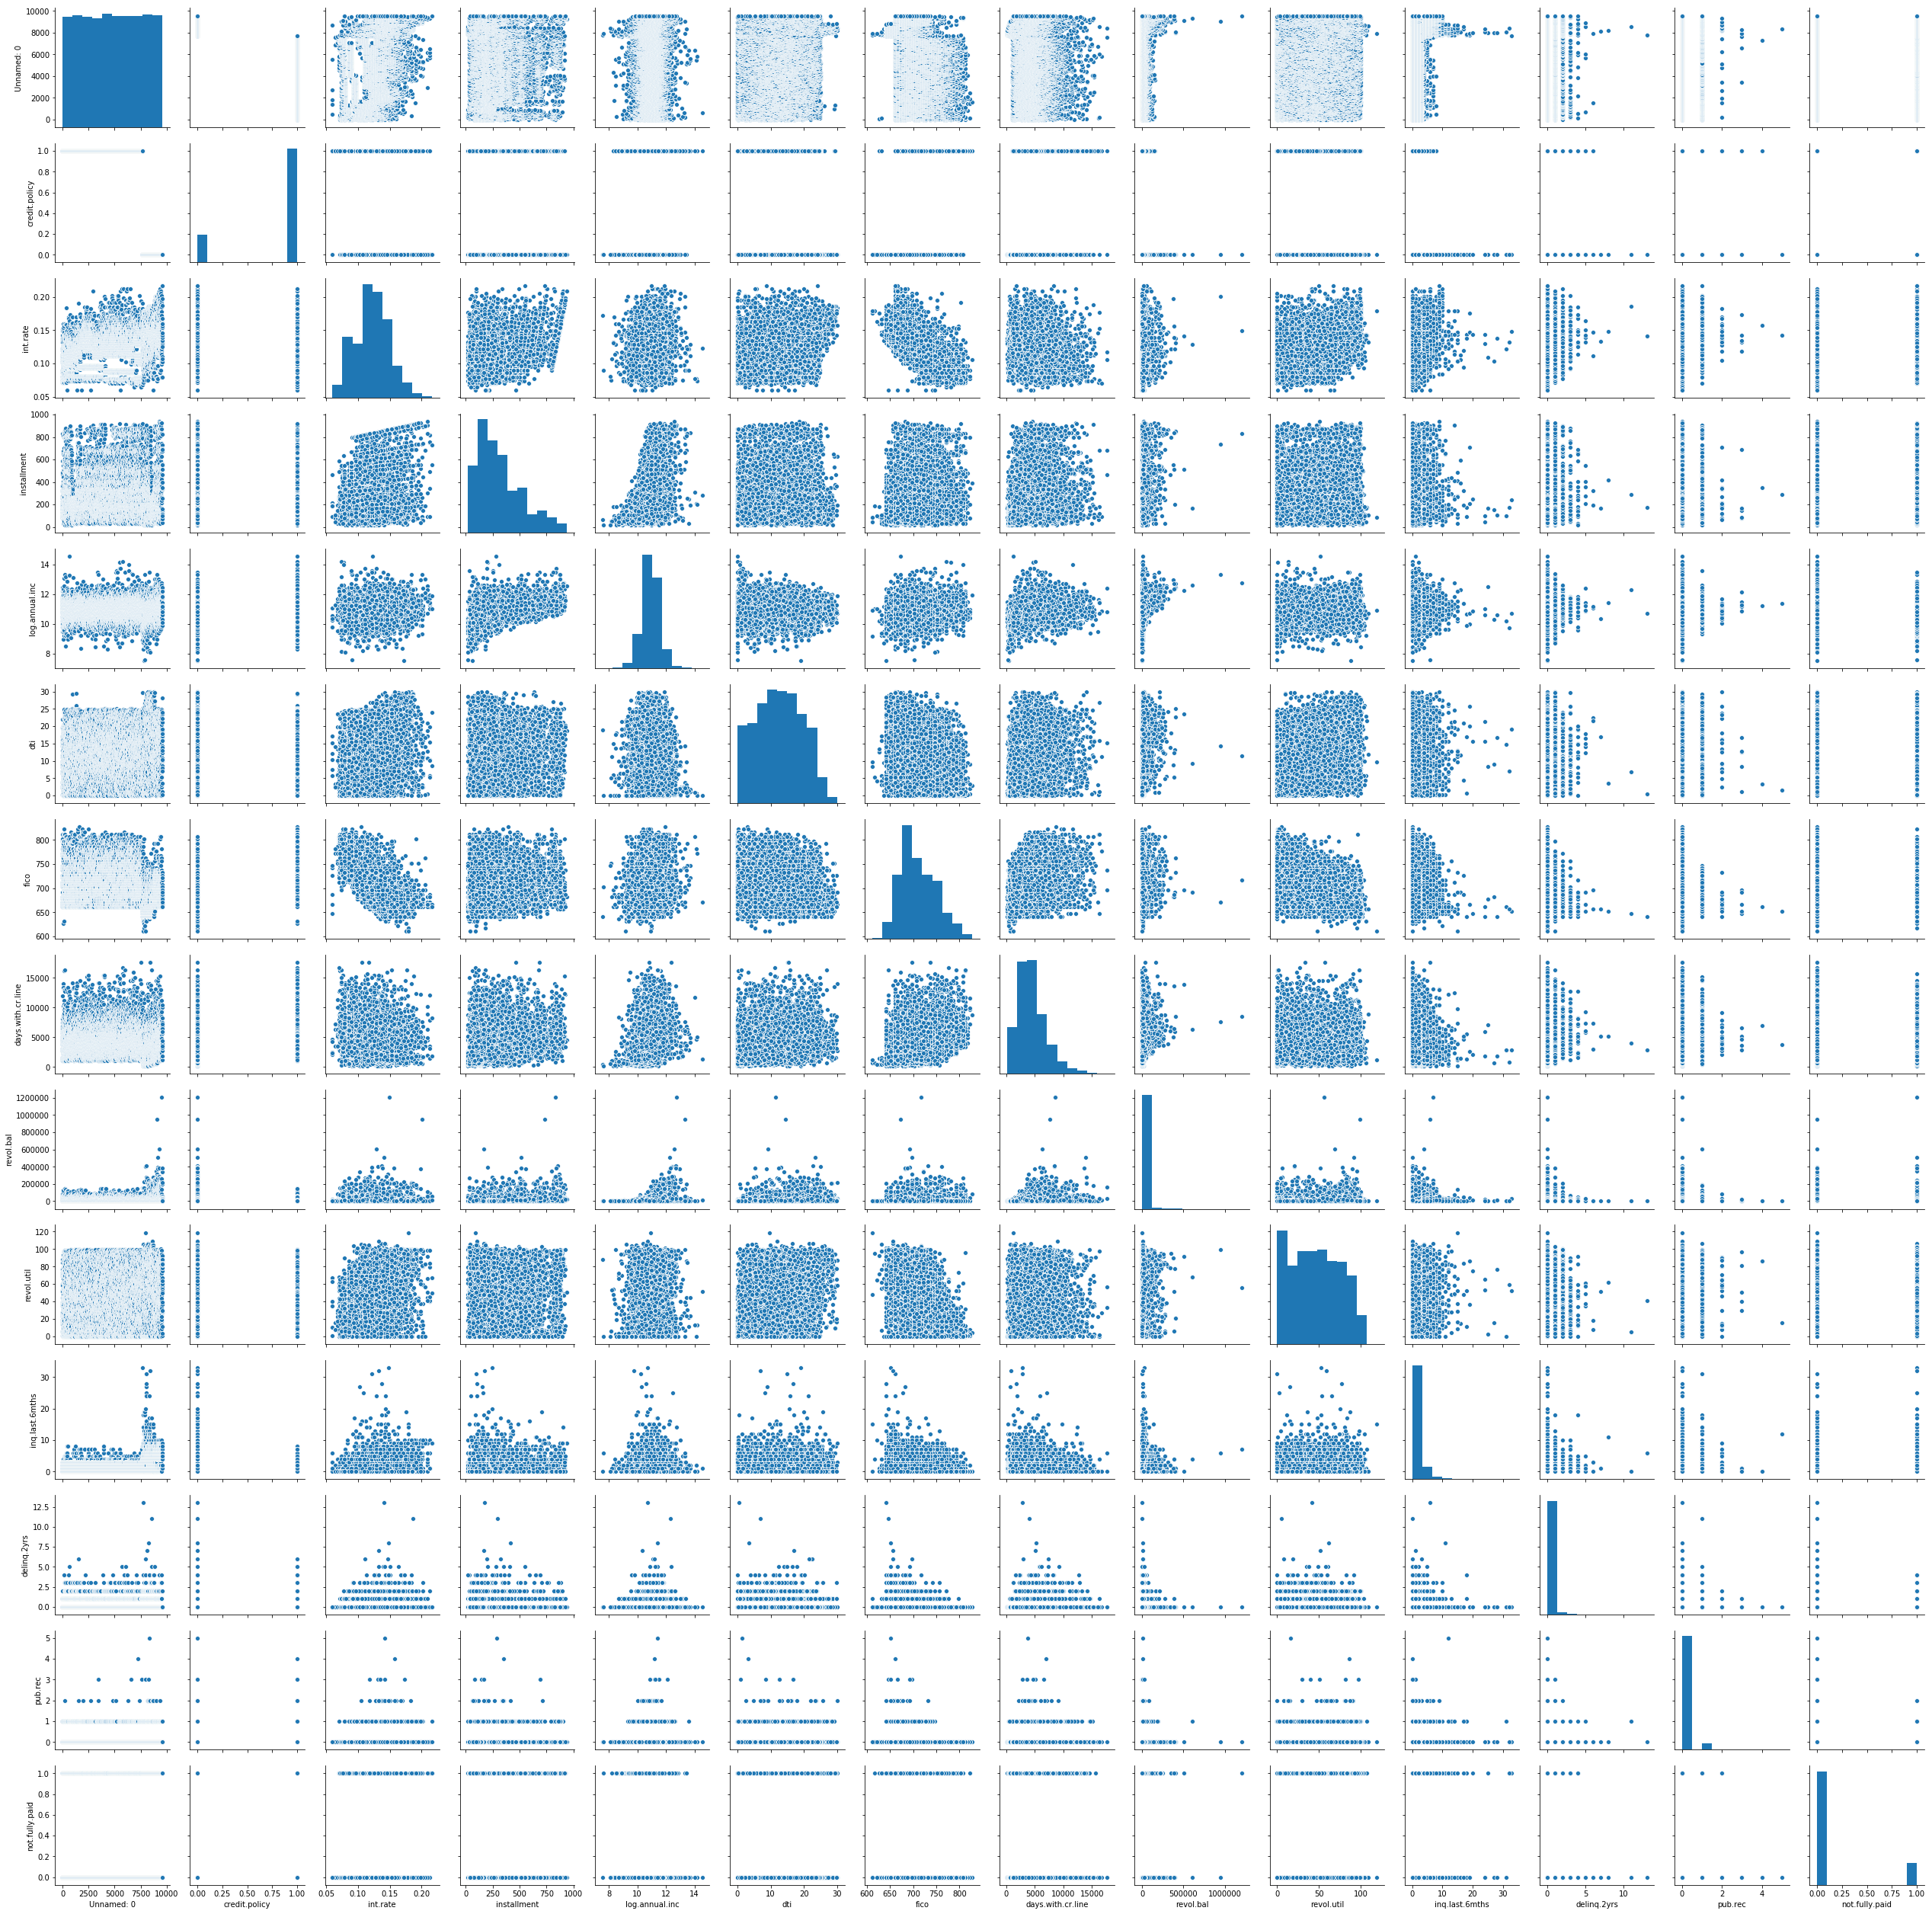

In [44]:
# Exploratory Data Aanalysis
sns.pairplot(df)

In [47]:
# Object type data 
#df.info()
df = pd.get_dummies(df)
df.head()

,Unnamed: 0,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,...,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0


In [48]:
# X_data, y_data division
x = df.drop(['not.fully.paid','Unnamed: 0'],axis = 1)
y = df['not.fully.paid']
print(x.head())
print(y.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  purpose_all_other  purpose_credit_card  \
0        0                  0                    0   
1 

In [49]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled[:5]

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[1.        , 0.37659847, 0.87988794, 0.54476222, 0.65020027,
        0.58139535, 0.31275414, 0.02389844, 0.43781513, 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.3011509 , 0.22991552, 0.50633368, 0.47696929,
        0.44186047, 0.14781752, 0.02784839, 0.64453782, 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.48401535, 0.37988253, 0.4048201 , 0.38818425,
        0.3255814 , 0.25949497, 0.002908  , 0.21512605, 0.03030303,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.26086957, 0.15865307, 0.54476222, 0.27036048,
        0.46511628, 0.1443789 , 0.02788483, 0.61512605, 0.03030303,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.   

In [50]:
# train data, test data division
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.3,random_state = 100)

In [60]:
from sklearn.model_selection import GridSearchCV

#param_grid = {'C' : [0.01,0.1,1,10,100],'gamma' : [0.01,0.1,1,10,100]}
#grid = GridSearchCV(SVC(),param_grid,refit=True,verbose = 3)
#grid.fit(x_train,y_train)
#grid.best_params_

params = {'n_estimators' : [10,20,30,50,100],'max_features' : [1,2,3,4,6,8,10,16,19]}


In [64]:
# Compare Algorithms - model selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


lr = LogisticRegression(fit_intercept=True)
lr.fit(x_train,y_train)

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train,y_train)

svm = SVC(C = 0.01,gamma = 0.01)
svm.fit(x_train,y_train)

rf = RandomForestClassifier(n_estimators = 50,max_features = 2, n_jobs = 7, oob_score = True)
#grid = GridSearchCV(estimator = rf,param_grid = params,cv = 5)
#grid.fit(x_train,y_train)

#from sklearn.mode_selection import cross_val_score
#print(cross_val_score(rf,x_train,y_train,cv = 5).mean())



#lr_predict = lr.predict(x_test)
#knn_predict = knn.predict(x_test)
#svm_predict = knn.predict(x_test)



C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [66]:
lr_predict = lr.predict(x_test)
knn_predict = knn.predict(x_test)
svm_predict = knn.predict(x_test)
rf_predict = grid.predict(x_test)

In [63]:
grid.best_params_

{'max_features': 2, 'n_estimators': 50}

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,lr_predict))
print(classification_report(y_test,knn_predict))
print(classification_report(y_test,svm_predict))
print(classification_report(y_test,rf_predict))

print('{}'.format(lr.score(x_test,y_test)))
print('{}'.format(knn.score(x_test,y_test)))
print('{}'.format(svm.score(x_test,y_test)))
print('{}'.format(grid.best_score_))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2156
           1       0.41      0.03      0.05       418

   micro avg       0.84      0.84      0.84      2574
   macro avg       0.62      0.51      0.48      2574
weighted avg       0.77      0.84      0.77      2574

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2156
           1       0.47      0.06      0.10       418

   micro avg       0.84      0.84      0.84      2574
   macro avg       0.66      0.52      0.51      2574
weighted avg       0.78      0.84      0.78      2574

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2156
           1       0.47      0.06      0.10       418

   micro avg       0.84      0.84      0.84      2574
   macro avg       0.66      0.52      0.51      2574
weighted avg       0.78      0.84      0.78      2574

              preci

In [145]:
import warnings
warnings.simplefilter('ignore')

models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_

In [72]:
# cross validaton을 통해 optimal model selection

from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,x_train,y_train,cv = 5).mean())
print(cross_val_score(lr,x_train,y_train,cv = 5).mean())

0.8421054233322851
0.8427704258745369


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [86]:
# pipeline을 활용해서 scaling하고 optimal model selection
# train data, test data division
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 100)

from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler',MinMaxScaler()),('rf',RandomForestClassifier())])
params = {'n_estimators' : [10,20,30,50,100]}
grid = GridSearchCV(pipe,param_grid=params,cv = 5,n_jobs = 7)
grid.fit(x_train,y_train)

ValueError: Invalid parameter n_estimators for estimator Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_s...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [149]:
pipelines

[('ScaledLR', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False))])),
 ('ScaledSVC', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False))])),
 ('ScaledKNN', Pipeline(memory=None,
       steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_

In [4]:
# ensemble 과 grid search를 활용한 model selection

In [ ]:
# final test score - test data

In [75]:
dt = pd.read_csv('loans_ts.csv')
dt.head()

,Unnamed: 0,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,8150,0,small_business,0.1299,505.34,11.407565,10.24,672,2250.000000,4162,68.4,14,0,1,1
1,7086,1,credit_card,0.1062,618.64,11.289782,13.29,737,5070.000000,14462,36.1,1,0,0,0
2,9374,0,all_other,0.1531,139.27,10.555813,8.34,667,3810.041667,1151,9.8,6,0,0,0
3,7439,1,home_improvement,0.1570,280.09,10.874266,7.36,662,4770.000000,10973,87.8,0,1,0,1
4,5345,1,credit_card,0.1531,870.39,11.727372,16.65,707,10590.000000,40413,85.6,0,0,0,0


In [76]:
dt = pd.get_dummies(dt)
x_t = dt.drop(['Unnamed: 0','not.fully.paid'],axis = 1)
y_t = dt['not.fully.paid']

In [77]:
x_scaled_t = min_max_scaler.transform(x_t)
x_scaled_t[:5]

array([[0.00000000e+00, 4.46930946e-01, 5.29676463e-01, 5.52950102e-01,
        3.41789052e-01, 2.79069767e-01, 1.18609568e-01, 3.44719342e-03,
        5.74789916e-01, 4.24242424e-01, 0.00000000e+00, 2.00000000e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.95396419e-01, 6.52233171e-01, 5.36077803e-01,
        4.43591455e-01, 5.81395349e-01, 2.80112346e-01, 1.19782103e-02,
        3.03361345e-01, 3.03030303e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.95268542e-01, 1.33698227e-01, 4.30937472e-01,
        2.78371162e-01, 2.55813953e-01, 2.07953916e-01, 9.53320429e-04,
        8.23529412e-02, 1.81818182e-01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00

In [78]:
# cross validaton을 통해 optimal model selection

from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,x_t,y_t,cv = 5).mean())
print(cross_val_score(lr,x_t,y_t,cv = 5).mean())

0.8340033750843772
0.8369834245856145


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w